# EDA of pvdaq-data of system 1431

datasource: 
- https://openei.org/wiki/PVDAQ/Sites/NREL_Windsite_PV_1-axis
- https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=pvdaq%2Fcsv%2Fpvdata%2Fsystem_id%3D1431%2F

information:
- singel-axis tracking
- 1082.85 kWdc
- BSk KG Climate Zone

##### Imports

In [13]:
from dotenv import load_dotenv
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import awswrangler as wr

### get data

##### secret environment variables for aws

In [7]:
load_dotenv()

True

##### Boto3 session to connect

In [10]:
boto_session = boto3.Session(
    aws_access_key_id=os.getenv("aws_access_key_id"),
    aws_secret_access_key=os.getenv("aws_secret_access_key"),
    aws_session_token=os.getenv("aws_session_token"),
    region_name=os.getenv("aws_default_region"),
)

##### import data from athena

In [ ]:
database = 'pvdaq'
table = 'system_id'

df = wr.athena.read_sql_query(
    f"SELECT * FROM {database}.{table}", 
    database=database,
    boto3_session=boto_session
)

df.head()

QueryFailed: HIVE_PARTITION_SCHEMA_MISMATCH: There is a mismatch between the table and partition schemas. The types are incompatible and cannot be coerced. The column 'ambient_temp__5079' in table 'pvdaq.system_id_1431_fcb4680220036e28fb18270b8aabd3bd' is declared as type 'string', but partition 'year=2009/month=12/day=11' declared column 'ambient_temp__5079' as type 'double'. You may need to manually clean the data at location 's3://aws-athena-query-results-941015873154-eu-central-1/tables/35a21a12-e1e2-4fa5-a3fa-46d12d905b53' before retrying. Athena will not delete data in your account.

### get insights

##### data description

| **Column Name**            | **Description**                                                                                             | **Data Type** |
|----------------------------|-------------------------------------------------------------------------------------------------------------|---------------|
| `measured_on`              | Date and time of the measurement (timestamp).                                                                | string        |
| `ambient_temp__5079`       | Ambient temperature near the solar panel or system (in degrees Celsius).                                     | string        |
| `kwh_gross__5082`          | Gross energy generation of the solar system in kilowatt-hours (kWh), before losses due to conversion or other factors. | string        |
| `kwh_net__5083`            | Net energy generation in kilowatt-hours (kWh), after considering conversion losses and other factors.       | string        |
| `module_temp__5080`        | Temperature of the solar panel (in degrees Celsius). A higher temperature can affect the efficiency of the panels. | string        |
| `poa_irradiance__5078`     | POA (Plane of Array) irradiance, the solar radiation falling on the solar panels (in watts per square meter, W/m²). | string        |
| `system_id`                | A unique identifier for the solar system (e.g., serial number or system ID).                                 | string        |
| `ac_power__5086`           | AC (Alternating Current) power generated by the solar system (in watts or kilowatts).                        | string        |
| `pr__5084`                 | Performance Ratio (PR), a metric indicating the efficiency of the solar system. It is the ratio of actual energy produced to the theoretical maximum. | string        |
| `dc_current__5088`         | DC (Direct Current) current generated by the solar modules (in amperes).                                     | string        |
| `dc_power__5089`           | DC (Direct Current) power generated by the solar modules (in watts).                                         | string        |
| `dc_voltage__5087`         | DC (Direct Current) voltage of the solar modules (in volts).                                                | string        |
| `year`                     | Year of the measurement.                                                                                   | string        |
| `month`                    | Month of the measurement.                                                                                  | string        |
| `day`                      | Day of the measurement.                                                                                     | string        |


In [23]:
df["system_id"].unique()

<FloatingArray>
[-0.0759999999999999, -0.0709329999999999,           -0.050666,
  0.7069999999999999,            6.744333,           17.791733,
             36.5092,           90.362466,          242.579133,
          361.597733,
 ...
            0.509666,  0.4815329999999999,  0.3943999999999999,
            0.144266,            0.209466,            0.289733,
  0.2541999999999999,            0.230333,            0.185666,
  0.0943999999999999]
Length: 130161, dtype: Float64

In [19]:
df['measured_on'] = pd.to_datetime(df['measured_on'])
df['ambient_temp__5079'] = pd.to_numeric(df['ambient_temp__5079'], errors='coerce') 
df['kwh_gross__5082'] = pd.to_numeric(df['kwh_gross__5082'], errors='coerce')  
df['kwh_net__5083'] = pd.to_numeric(df['kwh_net__5083'], errors='coerce')  
df['module_temp__5080'] = pd.to_numeric(df['module_temp__5080'], errors='coerce')  
df['poa_irradiance__5078'] = pd.to_numeric(df['poa_irradiance__5078'], errors='coerce')  
df['system_id'] = pd.to_numeric(df['system_id'], errors='coerce')  
df['ac_power__5086'] = pd.to_numeric(df['ac_power__5086'], errors='coerce')  
df['pr__5084'] = pd.to_numeric(df['pr__5084'], errors='coerce')   
df['dc_current__5088'] = pd.to_numeric(df['dc_current__5088'], errors='coerce')   
df['dc_power__5089'] = pd.to_numeric(df['dc_power__5089'], errors='coerce')   
df['dc_voltage__5087'] = pd.to_numeric(df['dc_voltage__5087'], errors='coerce')   
df['year'] = df['year'].astype(int)  
df['month'] = df['month'].astype(int)  
df['day'] = df['day'].astype(int)  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283802 entries, 0 to 283801
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   measured_on           283802 non-null  datetime64[ns]
 1   ambient_temp__5079    277524 non-null  Float64       
 2   kwh_gross__5082       278474 non-null  Float64       
 3   kwh_net__5083         279749 non-null  Float64       
 4   module_temp__5080     249179 non-null  Float64       
 5   poa_irradiance__5078  246878 non-null  Float64       
 6   system_id             277070 non-null  Float64       
 7   ac_power__5086        275553 non-null  Float64       
 8   pr__5084              146057 non-null  Float64       
 9   dc_current__5088      133564 non-null  Float64       
 10  dc_power__5089        36983 non-null   Float64       
 11  dc_voltage__5087      72951 non-null   Int64         
 12  year                  283802 non-null  int64         
 13 

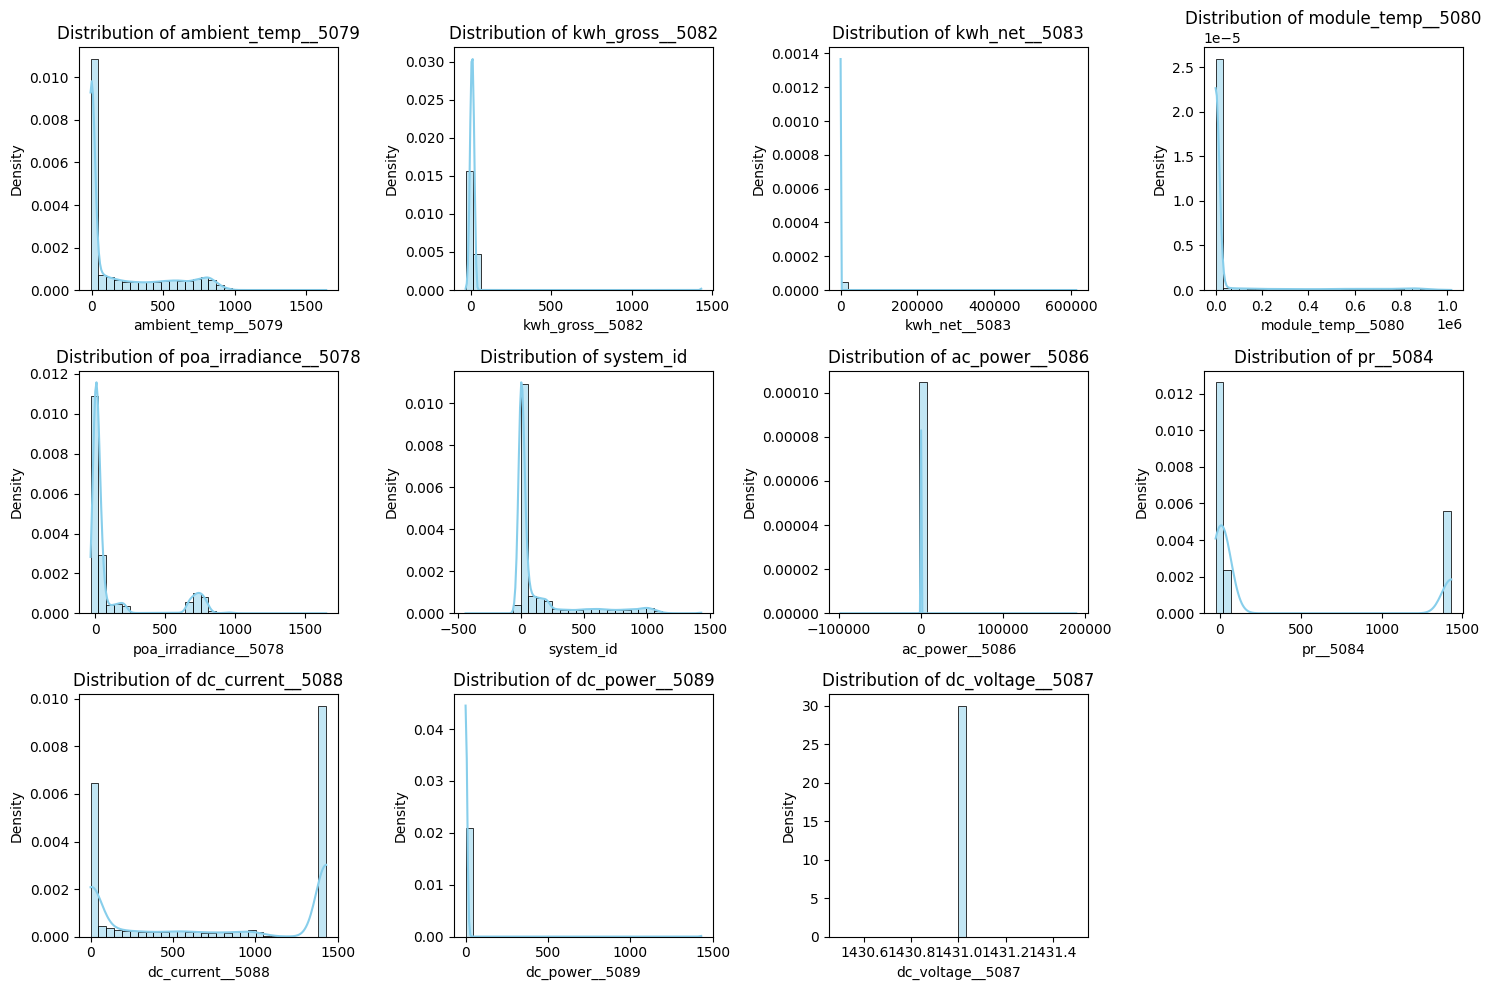

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot-Setup
plt.figure(figsize=(15, 10))

# Liste der numerischen Spalten, die du visualisieren möchtest
numerical_columns = [
    'ambient_temp__5079',
    'kwh_gross__5082',
    'kwh_net__5083',
    'module_temp__5080',
    'poa_irradiance__5078',
    'system_id',
    'ac_power__5086',
    'pr__5084',
    'dc_current__5088',
    'dc_power__5089',
    'dc_voltage__5087'
]

# Erstelle Histogramme oder Dichteplots für jede numerische Spalte
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # 3 Zeilen, 4 Spalten
    sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue', stat='density')  # KDE + Histogramm
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Layout optimieren
plt.tight_layout()
plt.show()
